<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_5_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Assignment 5: Hierarchical Clustering
# Calculating the Distances
import numpy as np
from scipy.spatial.distance import euclidean, cityblock

# Example of data points
point_A = np.array([2, 3])
point_B = np.array([5, 7])

euclid_dist = euclidean(point_A, point_B)
manhattan_dist = cityblock(point_A, point_B)

print("Euclidean Distance:", euclid_dist)
print("Manhattan Distance:", manhattan_dist)

Euclidean Distance: 5.0
Manhattan Distance: 7


Comparison:

Euclidean is sensitive to large differences

Manhattan is more robust for grid-like data

Agglomerative Clustering with Dendrograms:

Dataset Used:
Iris dataset (numerical, clean, widely accepted)

In [2]:
# Loading the Dataset
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

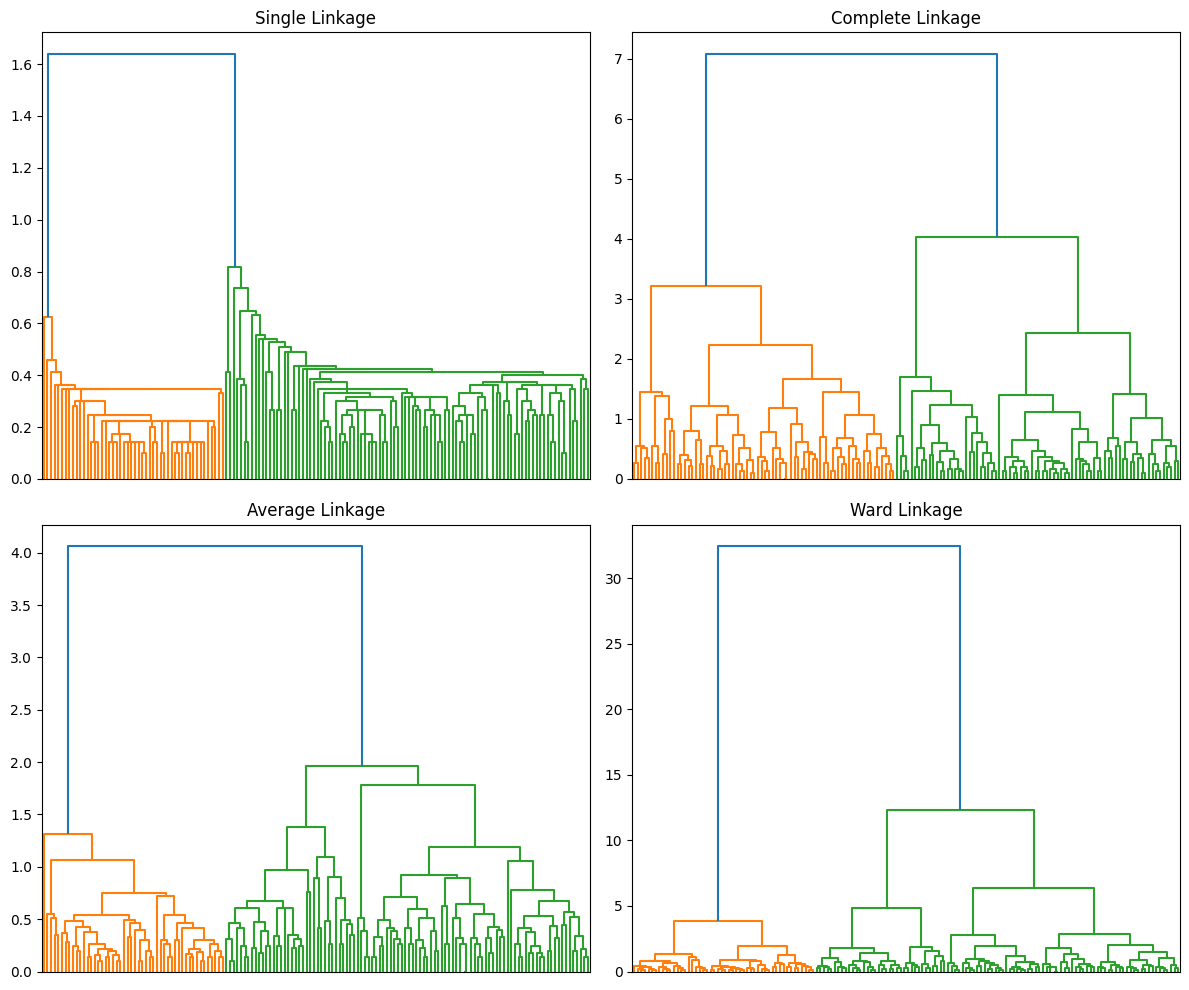

In [3]:
# Performing Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(12, 10))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    Z = linkage(X, method=method)
    dendrogram(Z, no_labels=True)
    plt.title(f"{method.capitalize()} Linkage")

plt.tight_layout()
plt.show()

Dendrogram Analysis:

Observations:

 Single linkage: Chaining effect, sensitive to noise

 Complete linkage: Compact clusters, well-separated

 Average linkage: Balanced behavior

 Ward’s linkage: Most structured, minimizes variance (best for Iris)

Cophenetic Correlation Coefficient:

Purpose:
Measures how well the dendrogram preserves original distances

Value close to 1 = better clustering structure

In [4]:
# Calculating Cophenetic Correlation
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

for method in linkage_methods:
    Z = linkage(X, method=method)
    coph_corr, _ = cophenet(Z, pdist(X))
    print(f"{method.capitalize()} linkage cophenetic correlation:", round(coph_corr, 3))

Single linkage cophenetic correlation: 0.864
Complete linkage cophenetic correlation: 0.727
Average linkage cophenetic correlation: 0.877
Ward linkage cophenetic correlation: 0.873


Interpretation:

Higher values indicate better distance preservation

Ward and Complete typically perform best

Connectivity Constraints:

Explanation:

Connectivity constraints restrict which points can merge

Useful when spatial or logical relationships matter

Real-World Example:

Image segmentation: Only neighboring pixels can form clusters

Road networks: Only connected intersections can cluster

Summary
Findings:

Agglomerative clustering is intuitive and interpretable

Linkage choice significantly affects cluster shape

Ward’s linkage performs best on structured numerical data

Cophenetic correlation helps validate dendrogram quality

Connectivity constraints add realism in spatial problems